In [89]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np


In [90]:
C_Video_path = "audio/C_Video.wav"
ipd.Audio(C_Video_path)

In [91]:
C5_path = "audio/C5.wav"
ipd.Audio(C5_path)

In [92]:
A4_path = "audio/A4.wav"
ipd.Audio(A4_path)

In [93]:
signal_C_Video, sr_C_Video = librosa.load(C_Video_path, duration=2)
signal_C5, sr_C5 = librosa.load(C5_path, duration=2)
signal_A4, sr_A4 = librosa.load(A4_path, duration=2)

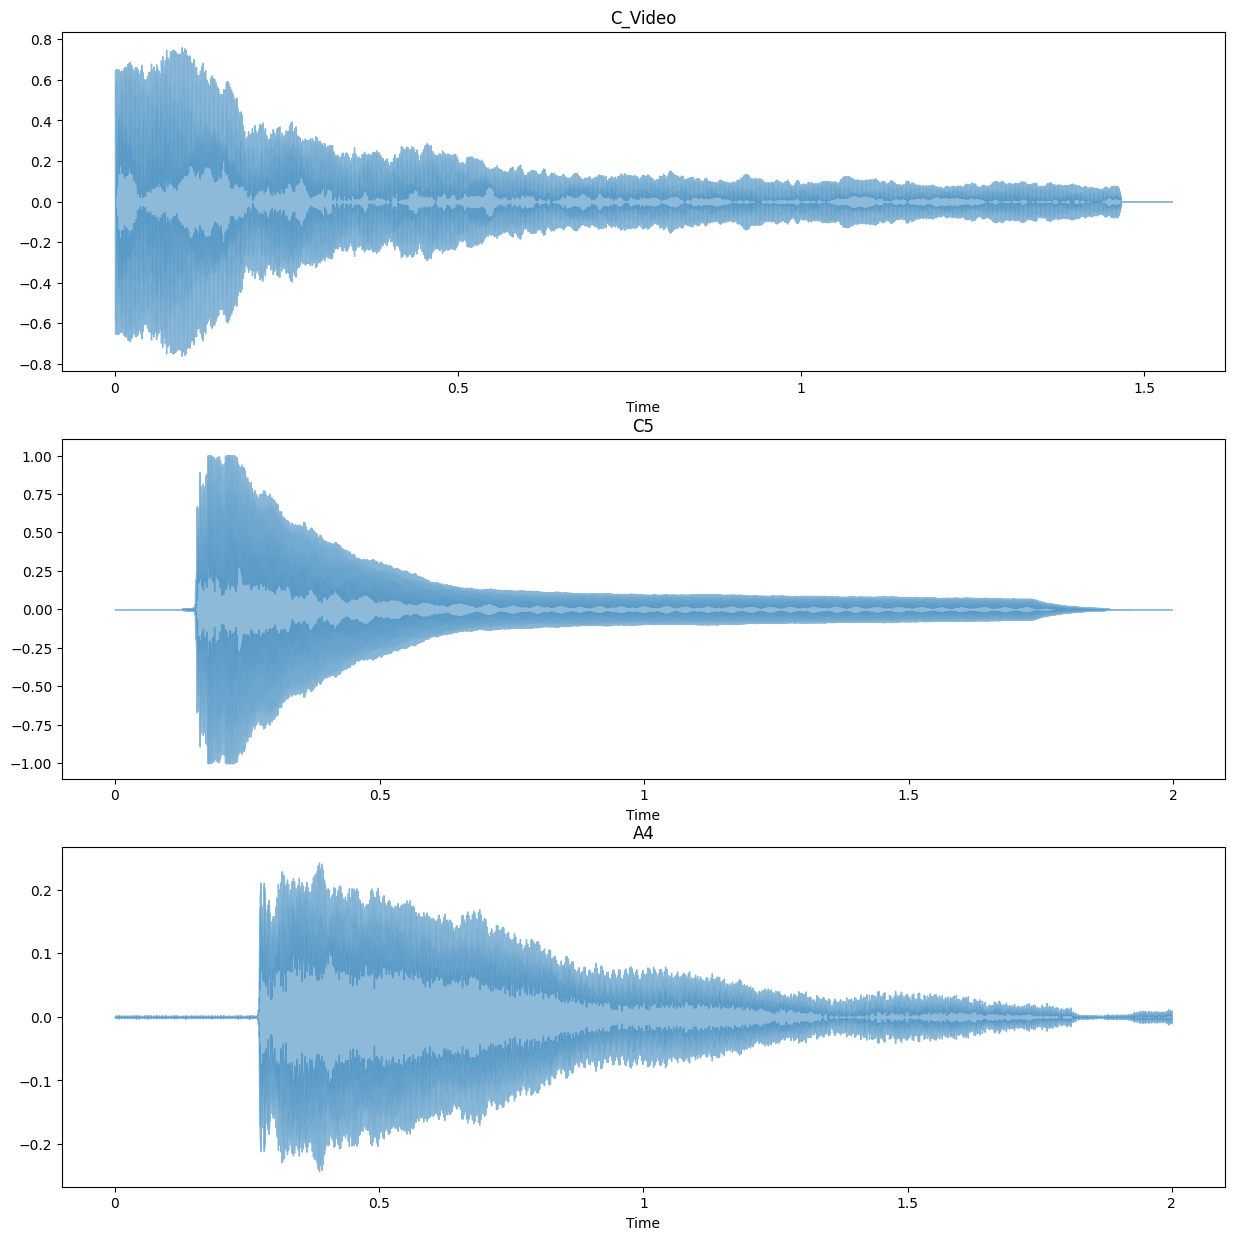

In [ ]:
plt.figure(figsize = (15, 15))

plt.subplot(3, 1, 1)
librosa.display.waveshow(signal_C_Video, alpha=0.5)
plt.title("C_Video")
#plt.ylim(-1,1)

plt.subplot(3, 1, 2)
librosa.display.waveshow(signal_C5, alpha=0.5)
plt.title("C5")
#plt.ylim(-1,1)

plt.subplot(3, 1, 3)
librosa.display.waveshow(signal_A4, alpha=0.5)
plt.title("A4")
#plt.ylim(-1,1)


plt.show()

In [95]:
ft_C_Video = sp.fft.fft(signal_C_Video)
ft_C5 = sp.fft.fft(signal_C5)
ft_A4 = sp.fft.fft(signal_A4)

magnitude_C_Video = np.absolute(ft_C_Video)
magnitude_C5 = np.absolute(ft_C5)
magnitude_A4 = np.absolute(ft_A4)

frequency_C_Video = np.linspace(0, sr_C_Video, len(magnitude_C_Video))
frequency_C5 = np.linspace(0, sr_C5, len(magnitude_C5))
frequency_A4 = np.linspace(0, sr_A4, len(magnitude_A4))


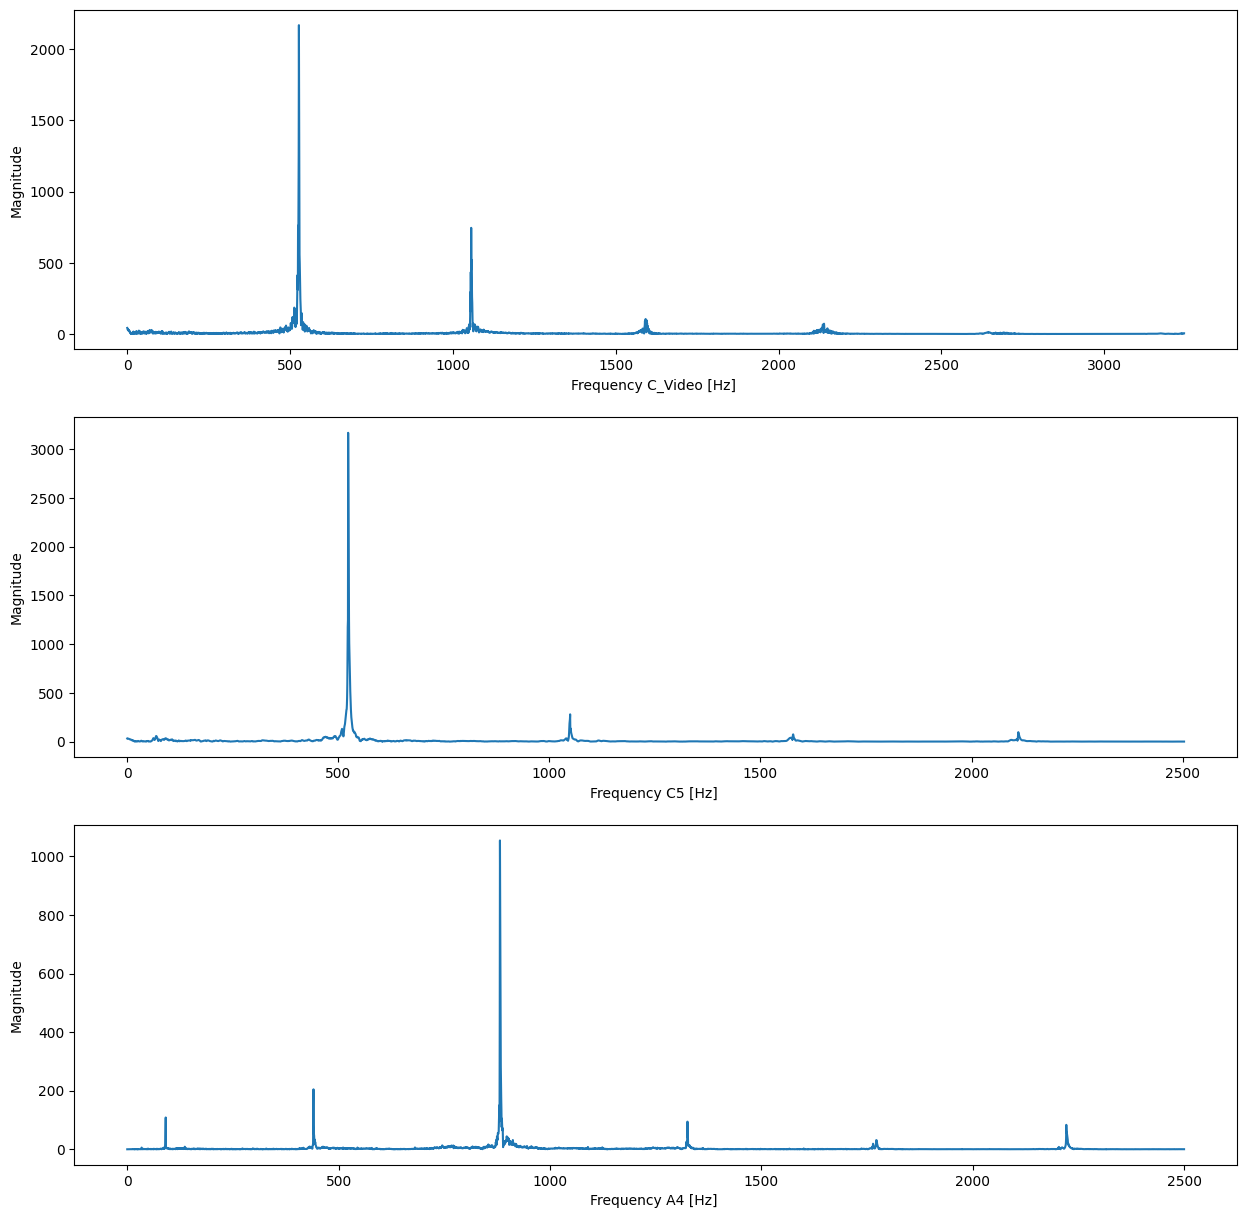

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(3, 1, 1)
plt.plot(frequency_C_Video[:5000], magnitude_C_Video[:5000])
plt.xlabel("Frequency C_Video [Hz] ")
plt.ylabel("Magnitude")

plt.subplot(3, 1, 2)
plt.plot(frequency_C5[:5000], magnitude_C5[:5000])
plt.xlabel("Frequency C5 [Hz] ")
plt.ylabel("Magnitude")

plt.subplot(3, 1, 3)
plt.plot(frequency_A4[:5000], magnitude_A4[:5000])
plt.xlabel("Frequency A4 [Hz] ")
plt.ylabel("Magnitude")

plt.show()

In [98]:
print(len(signal_C_Video), len(signal_C5), len(signal_A4))

print(sr_C_Video, sr_C5, sr_A4)

print(f"Duration: {(signal_C_Video.size/sr_C_Video):.4f}, {(signal_C5.size/sr_C5):.4f}, {(signal_A4.size/sr_A4):.4f} ")

d = 1 / sr_A4
print(f"Duration of one sample: {d}")

d_523 = 1 / 523
print(f"Duration of one Cycle to Base Frequency C5: {d_523}")

d_440 = 1 / 440
print(f"Duration of one Cycle to Base Frequency A4: {d_440}")



d_400_samples = d * 400
print(f"Duration of 400 samples: {d_400_samples}")



33968 44032 44100
22050 22050 22050
Duration: 1.5405, 1.9969, 2.0000 
Duration of one sample: 4.5351473922902495e-05
Duration of one Cycle to Base Frequency C5: 0.0019120458891013384
Duration of one Cycle to Base Frequency A4: 0.0022727272727272726
Duration of 400 samples: 0.018140589569160998


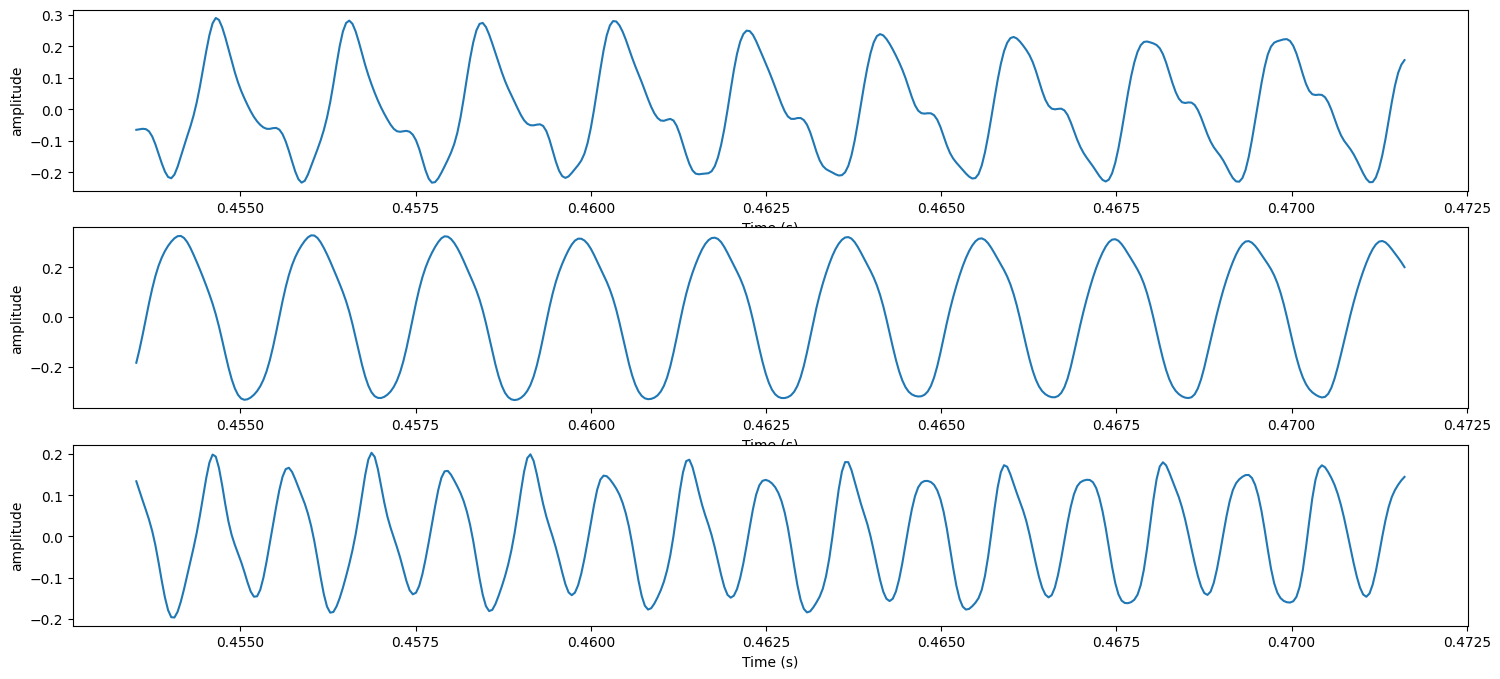

In [ ]:
samples_C_Video = range(len(signal_C_Video))
t_C_Video = librosa.samples_to_time(samples_C_Video, sr=sr)

samples_C5 = range(len(signal_C5))
t_C5 = librosa.samples_to_time(samples_C5, sr=sr)


samples_A4 = range(len(signal_A4))
t_A4 = librosa.samples_to_time(samples_A4, sr=sr)

plt.figure(figsize = (18,8))

plt.subplot(3, 1, 1)
plt.plot(t_C_Video[10000:10400], signal_C_Video[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("amplitude")

plt.subplot(3, 1, 2)
plt.plot(t_C5[10000:10400], signal_C5[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("amplitude")

plt.subplot(3, 1, 3)
plt.plot(t_A4[10000:10400], signal_A4[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("amplitude")

plt.show()

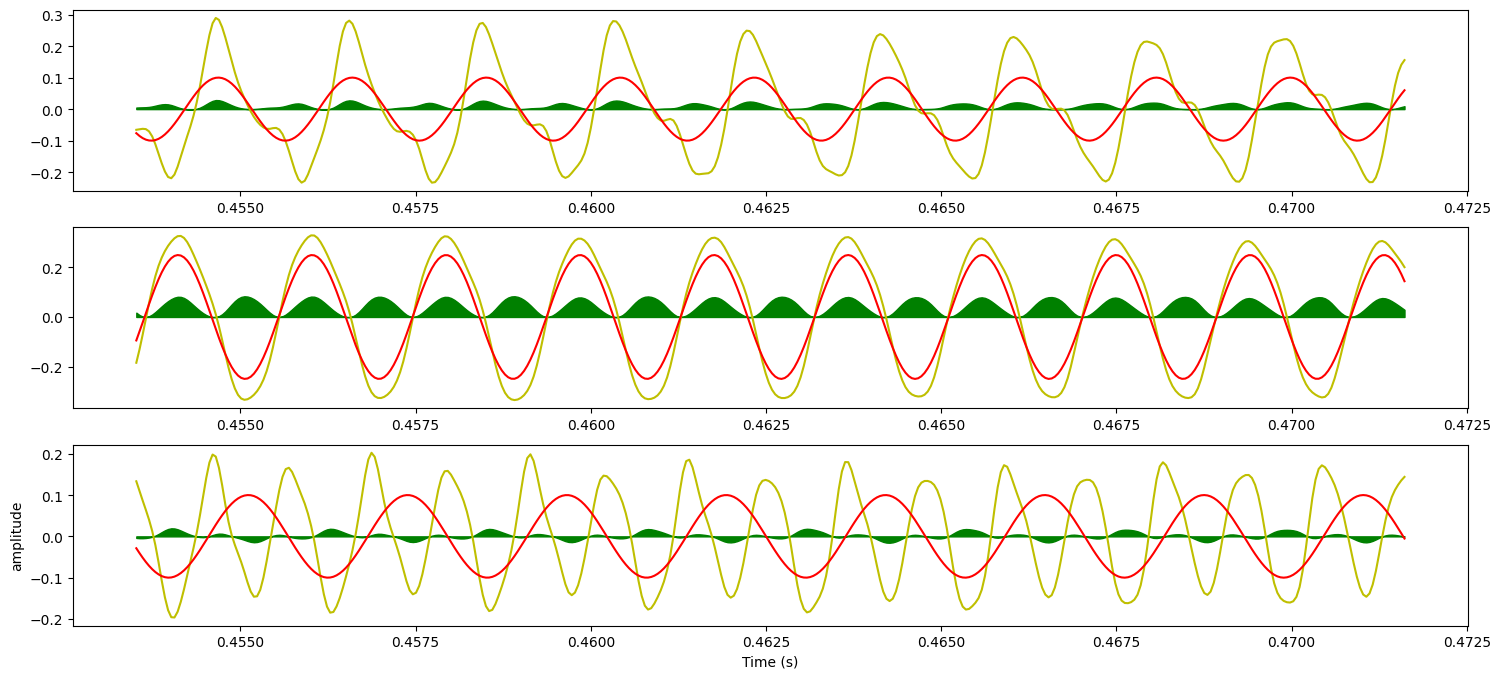

In [ ]:
f_C5 = 523
f_A4 = 440
phase1 = 0.25
phase2 = 0.55
phase3 = 0

sin_C_Video = 0.1 * np.sin(2*np.pi * (f_C5 * t_C_Video - phase2))
sin_C5 = 0.25 * np.sin(2*np.pi * (f_C5 * t_C5 - phase1))
sin_A4 = 0.1 * np.sin(2*np.pi * (f_A4 * t_A4 - phase3))


plt.figure(figsize=(18,8))

plt.subplot(3,1,1)
plt.plot(t_C_Video[10000:10400], signal_C_Video[10000:10400], color = "y")
plt.plot(t_C_Video[10000:10400], sin_C_Video[10000:10400], color = "r")
plt.fill_between(t_C_Video[10000:10400], sin_C_Video[10000:10400] * signal_C_Video[10000:10400], color = "g")

plt.subplot(3,1,2)
plt.plot(t_C5[10000:10400], signal_C5[10000:10400], color = "y")
plt.plot(t_C5[10000:10400], sin_C5[10000:10400], color = "r")
plt.fill_between(t_C5[10000:10400], sin_C5[10000:10400] * signal_C5[10000:10400], color = "g")

plt.subplot(3,1,3)
plt.plot(t_A4[10000:10400], signal_A4[10000:10400], color = "y")
plt.plot(t_A4[10000:10400], sin_A4[10000:10400], color = "r")
plt.fill_between(t_A4[10000:10400], sin_A4[10000:10400] * signal_A4[10000:10400], color = "g")

plt.xlabel("Time (s)")
plt.ylabel("amplitude")

plt.show()